# Overview

The following notebook applies analytics and machine learning tools on a realistic dataset. The dataset utilised in Titanic Dataset and the objective is to explore this dataset and draw inference. As an additional step the author has tried to apply machine learning modelling algorithms for prediction purpose.

There are several components to this notebook, the author has provided a basic explanation and notes behind his methodology for each.


1. Loading and processing the data, providing an initial overview of author's interpretation of the data / columns.

2. Performing exploratory data analysis for better understanding the data.

3. Cleaning the data, this is a realistic dataset and has some errors.

4. Performing feature engineering, deriving features from the data, processing and preparing the data for model.

5. Creating train/test datasets for evaluation.

6. Creating initial models and evaluating the accuracy of models.

7. Improving on initial models  to achieve a higher accuracy.


**Let's get started!**

# Import Libraries

Importing all of the initial python libraries needed here
The following libraries are utilised<br>
<li>pandas</li>
<li>numpy</li>
<li>matplotlib</li>
<li>seaborn</li>
<li>scikit-learn</li>
<li>xgboost</li>
<li>lightgbm</li>
<li>IPython</li>
<li>warnings</li>

In [65]:
# IMPORT YOUR LIBRARIES HERE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from IPython.display import display, HTML
import warnings
warnings.simplefilter('ignore')

%matplotlib inline

# 1. Load and Process the Data

Loading titanic dataset file `dataset.csv` and providing a brief point-form explanation of the dataset and columns, this is the preliminary work needed before moving forward.

The final column is the target to determine if the passenger survived (1/0 value).

Lets first load the datset into a pandas dataframe and print few rows.

In [66]:
 # LOAD AND PROCESS THE DATA HERE
df = pd.read_csv('dataset.csv')
df.head(3)

,passenger_id,ticket,ticket_cost,port,class,cabin_number,full_name,sex,age,siblings_or_spouse,parents_or_children,survived
0,1,A/5 21171,7.2500,S,3,NaN,"Braund, Mr. Owen Harris",male,22.0,1,0,0
1,2,PC 17599,71.2833,C,1,C85,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,1
2,3,STON/O2. 3101282,7.9250,S,3,NaN,"Heikkinen, Miss. Laina",female,26.0,0,0,1


There are 12 columns in our dataset. The columns can be further grouped into index, numeric, categorical and target columns.

In [67]:
# columns types
index_column = 'passenger_id'
numeric_columns = ['ticket_cost', 'age', 'siblings_or_spouse', 'parents_or_children']
categorical_columns = ['ticket', 'port', 'class', 'cabin_number', 'full_name']
target_columns = 'survived'

### First Look

Lets have a first look into our dataset. The summary statistics of numeric, categorical and target columns can provide a basic understanding of our dataset.

In [68]:
display(HTML('<h3>Summary statistics of numeric columns</h3>'))
display(df[numeric_columns].describe())
display(HTML('<br>'))

display(HTML('<h3>Summary statistics of categorical columns</h3>'))
display(df[categorical_columns].astype(str).describe())
display(HTML('<br>'))

display(HTML('<h3>Target columns statistics</h3>'))
display(df[target_columns].value_counts())
display(HTML('<br>'))

,ticket_cost,age,siblings_or_spouse,parents_or_children
count,891.000000,714.000000,891.000000,891.000000
mean,32.204208,29.699118,0.523008,0.381594
std,49.693429,14.526497,1.102743,0.806057
min,0.000000,0.420000,0.000000,0.000000
25%,7.910400,20.125000,0.000000,0.000000
50%,14.454200,28.000000,0.000000,0.000000
75%,31.000000,38.000000,1.000000,0.000000
max,512.329200,80.000000,8.000000,6.000000


,ticket,port,class,cabin_number,full_name
count,891,891,891,891,891
unique,681,4,3,148,891
top,CA. 2343,S,3,nan,"Farthing, Mr. John"
freq,7,644,491,687,1


0    549
1    342
Name: survived, dtype: int64

<font color='#ED7217'><h3>BASIC ANALYSIS</h3></font>

<pre>
<font size="4" color="#09919F">
<li> <b>Number of Samples</b>   :   891</li>
<li> <b>Number of Columns</b>   :    12</li>
<li> <b>Index Columns</b>       :   passenger_id</li>
<li> <b>Numeric Columns</b>     :   ticket_cost, age, siblings_or_spouse, parents_or_children</li>
<li> <b>Categorical Columns</b> :   ticket, port, class, cabin_number, full_name</li>
<li> <b>Target Columns</b>      :   survived</li>
<li> <b>Age Distribution</b>    :   feature_name : age, min : 0, median : 28, max : 80</li>
<li> <b>Ticket Cost</b>         :   feature_name : ticket_cost, min : 0, median : 14.45, max : 512</li>
<li> <b>Port</b>                :   feature_name : port, three types S, C, Q</li>
<li> <b>Class</b>               :   feature_name : class, three_types 1, 2, 3</li>
<li> <b>Ticket</b>              :   <font color='green'><i>681 unique tickets are shared between 891 passengers</i></font></li>
<li> <b>Cabin Number</b>        :   feature_name : cabin_number, missing for 687 out of 891 samples</li>
<li> <b>Siblings/Spouse</b>     :   feature_name : siblings_or_spouse, min : 0, median : 0, max : 8</li>
<li> <b>Parents/Children</b>    :   feature_name : parents_or_children, min : 0, median : 0, max : 6</li>
</font>
</pre>

<b>

# 2. Exploratory Data Analysis

## 2.1 Analyze the Data for Errors

Checking for expected data types for our columns in the dataset.

In [69]:
# column types for the dataset
df.dtypes

passenger_id             int64
ticket                  object
ticket_cost            float64
port                    object
class                    int64
cabin_number            object
full_name               object
sex                     object
age                    float64
siblings_or_spouse       int64
parents_or_children      int64
survived                 int64
dtype: object

<br>
<li >We can conclude from the above table that the data type of different columns is as expected. There are no such discrepancies like text in a numeric column, in our dataset.</li>

As this data represents a realistic case, missing values are expected. Checking for missing values in our dataset.

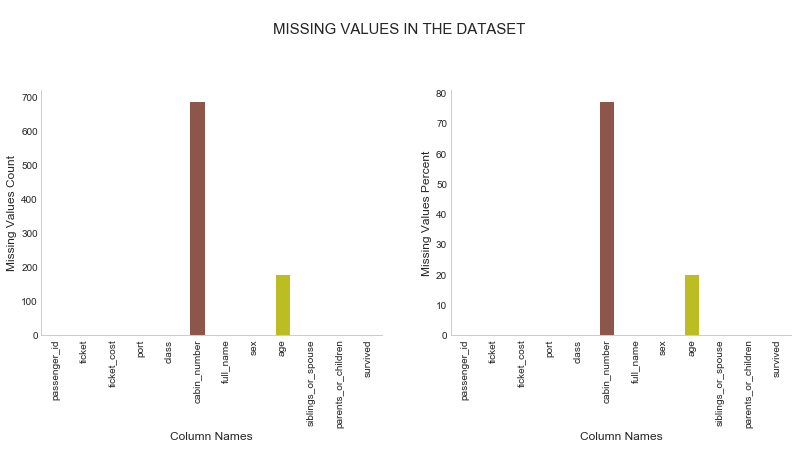

In [70]:
# missing values in the dataset

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
fig.suptitle('\nMISSING VALUES IN THE DATASET', fontsize=15, y=1.1)

df.isnull().sum().plot.bar(ax=axes[0]);
(df.isnull().mean() * 100).plot.bar(ax=axes[1])


axes[0].set_xlabel('Column Names', fontsize=12)
axes[0].set_ylabel('Missing Values Count', fontsize=12)

axes[1].set_xlabel('Column Names', fontsize=12)
axes[1].set_ylabel('Missing Values Percent', fontsize=12)

plt.tight_layout(pad=2.08)

sns.set_style("whitegrid", {'axes.grid' : False})
sns.despine()
plt.tight_layout(pad=4)

Inspecting outliers for age and ticket_cost columns.

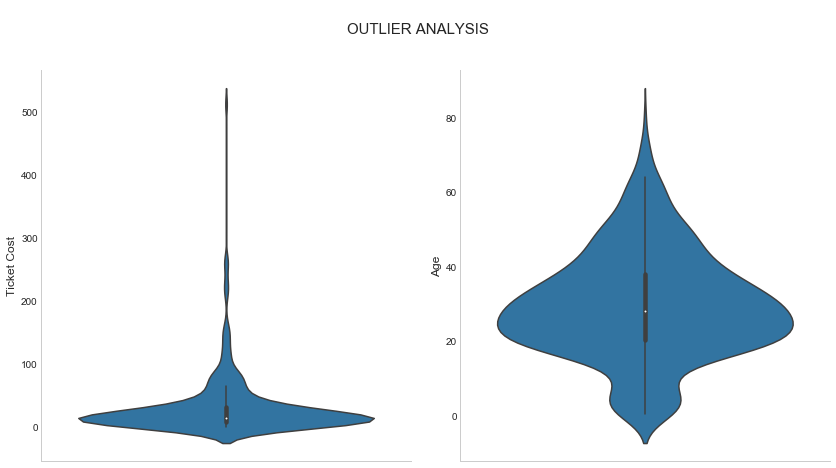

In [71]:
# Outlier Analysis
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
fig.suptitle('\nOUTLIER ANALYSIS', fontsize=15, y=1.1)

sns.violinplot(df.ticket_cost, ax=axes[0], orient='v')
axes[0].set_ylabel('Ticket Cost', fontsize=12)

sns.violinplot(df.age, ax=axes[1], orient='v')
axes[1].set_ylabel('Age', fontsize=12)

sns.despine()
plt.tight_layout(pad=2.08)

<li>There are possible outliers in the age and ticket_cost columns of our dataset.</li>

<font color='#ED7217'><h3>DATA ERROR ANALYSIS</h3></font>

<pre>
<font size="4" color="#09919F">
<li> <b>Columns with missing values</b>     : age, port, cabin_number</li>
<li>            <b>port</b>                 : missing for   2 out of 891 samples (neg.)</li>
<li>            <b>age</b>                  : missing for 177 out of 891 samples (20 %)</li>
<li>            <b>cabin_number</b>         : missing for 687 out of 891 samples (77 %)</li>
<li> <b>Columns with suspected outliers</b> : age, ticket_cost</li>
</font>
</pre>

## 2.2 Exploratory Data Analysis

Performing exploratory data analysis, including descriptive statistics and visualizations to better understand the attributes of the data.

### Univariate Analysis

We can find simple direct relationship between a predictor and the target column using univariate analysis. It will help us to identify important predictors in the dataset. Lets go deep for each column wrt to target column.

#### SURVIVED

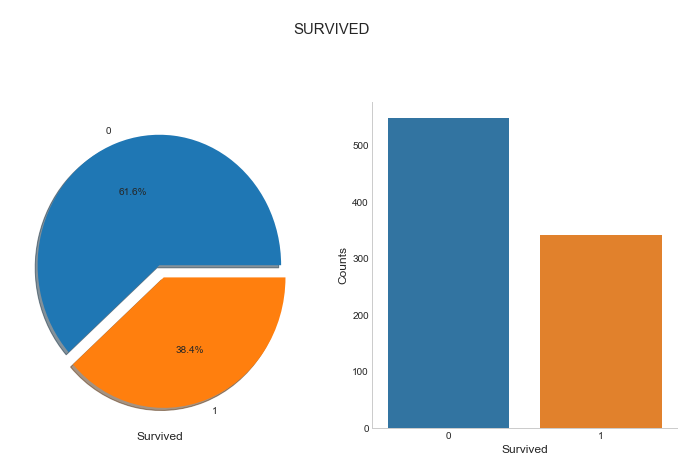

In [72]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
fig.suptitle('\nSURVIVED', fontsize=15, y=1.1)

df.survived.value_counts().plot.pie(explode = [0,0.1], autopct = '%1.1f%%', ax = axes[0], shadow=True)
axes[0].set_xlabel('Survived', fontsize=12)
axes[0].set_ylabel('', fontsize=12)

sns.countplot('survived', data = df, ax = axes[1])
sns.despine()
axes[1].set_xlabel('Survived', fontsize=12)
axes[1].set_ylabel('Counts', fontsize=12)

plt.show()

<font size="3" color="#1C1AAB">
<li>There is a class imbalance evident from the distribution.</li><br>
<li>The survival percent for our dataset is 38.4 %.</li>
</font>

#### TICKET COST

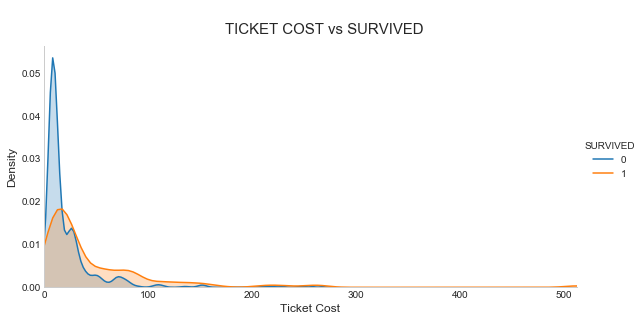

In [73]:
facet = sns.FacetGrid(df, hue="survived", aspect=2, size=4)
facet.map(sns.kdeplot, 'ticket_cost', shade= True)
facet.set(xlim=(0, df['ticket_cost'].max()))

facet.fig.suptitle('\nTICKET COST vs SURVIVED', fontsize=15, y=1.1)
facet.set_xlabels('Ticket Cost', fontsize=12)
facet.set_ylabels('Density', fontsize=12)

facet.add_legend(title='SURVIVED');

<font size="3" color="#1C1AAB">
<li>The ticket_cost distribution for survived passengers is shifted towards right when compared to not survived passengers.</li>
</font>

#### AGE

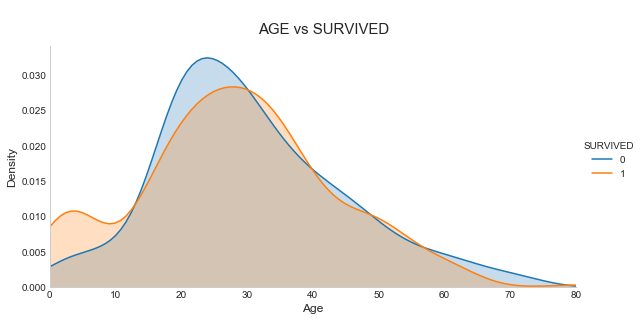

In [74]:
facet = sns.FacetGrid(df, hue="survived", aspect=2, size=4)
facet.map(sns.kdeplot, 'age', shade= True)
facet.set(xlim=(0, df['age'].max()))

facet.fig.suptitle('\nAGE vs SURVIVED', fontsize=15, y=1.1)
facet.set_xlabels('Age', fontsize=12)
facet.set_ylabels('Density', fontsize=12)

facet.add_legend(title='SURVIVED');

<font size="3" color="#1C1AAB">
<li>There is a slight shift in age distribution towards left for survived individuals.</li>
<li>The age variable can possibly add some information helpful for prediction of survival.</li>
</font>

#### SEX

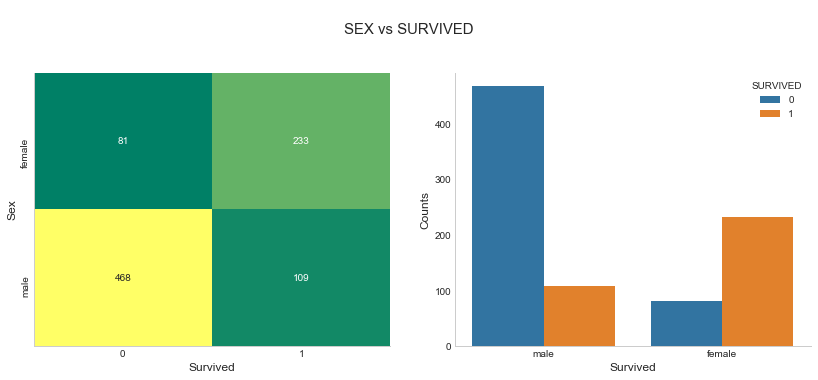

In [75]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
fig.suptitle('\nSEX vs SURVIVED', fontsize=15, y=1.1)

sns.heatmap(pd.crosstab(df.sex, df.survived), annot=True, fmt='.3g', cmap='summer', ax=axes[0], cbar=False)
axes[0].set_xlabel('Survived', fontsize=12)
axes[0].set_ylabel('Sex', fontsize=12)

sns.countplot('sex', hue='survived', data=df, ax=axes[1])
sns.despine()
axes[1].set_xlabel('Survived', fontsize=12)
axes[1].set_ylabel('Counts', fontsize=12)
axes[1].legend(loc=1, title='SURVIVED')

plt.tight_layout(pad=3)

<font size="3" color="#1C1AAB">
<li>Can be clearly noticed that the survival probability of female is much higher when compared to male.</li>
<li>This feature is very informative for survival prediction.</li>
</font>

#### CLASS

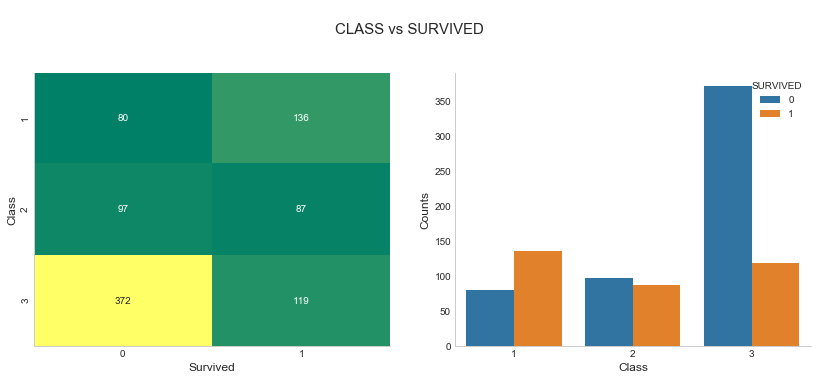

In [76]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
fig.suptitle('\nCLASS vs SURVIVED', fontsize=15, y=1.1)

sns.heatmap(pd.crosstab(df['class'], df.survived), annot=True, fmt='.3g', cmap='summer', ax=axes[0], cbar=False)
axes[0].set_xlabel('Survived', fontsize=12)
axes[0].set_ylabel('Class', fontsize=12)

sns.countplot('class', hue='survived', data=df, ax=axes[1])
sns.despine()
axes[1].set_xlabel('Class', fontsize=12)
axes[1].set_ylabel('Counts', fontsize=12)
axes[1].legend(loc=1, title='SURVIVED')

plt.tight_layout(pad=3)

<font size="3" color="#1C1AAB">
<li>Survival chance is highest for class 1 and lowest for class 3.</li>
</font>

#### PORT

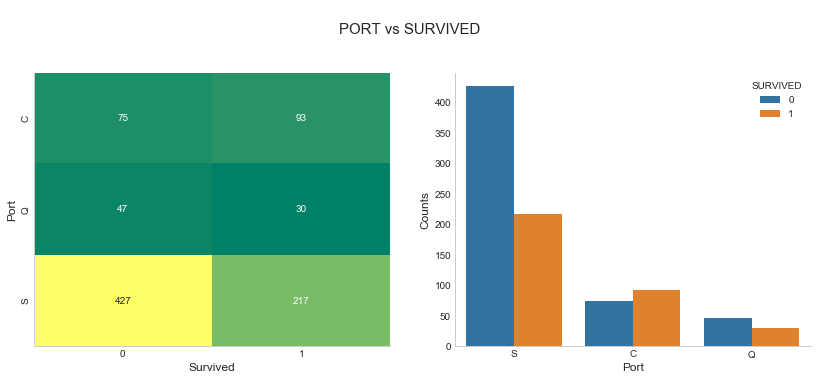

In [77]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
fig.suptitle('\nPORT vs SURVIVED', fontsize=15, y=1.1)

sns.heatmap(pd.crosstab(df.port, df.survived), annot=True, fmt='.3g', cmap='summer', ax=axes[0], cbar=False)
axes[0].set_xlabel('Survived', fontsize=12)
axes[0].set_ylabel('Port', fontsize=12)

sns.countplot('port', hue='survived', data=df, ax=axes[1])
sns.despine()
axes[1].set_xlabel('Port', fontsize=12)
axes[1].set_ylabel('Counts', fontsize=12)
axes[1].legend(loc=1, title='SURVIVED')

plt.tight_layout(pad=3)

<font size="3" color="#1C1AAB">
<li>Port C and Port Q have higher survival rate when compared to Port S.</li>
</font>

#### SIBLINGS / SPOUSES

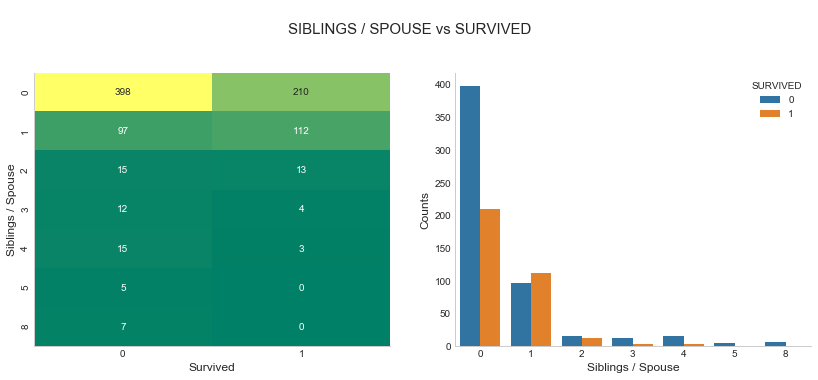

In [78]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
fig.suptitle('\nSIBLINGS / SPOUSE vs SURVIVED', fontsize=15, y=1.1)

sns.heatmap(pd.crosstab(df.siblings_or_spouse, df.survived), annot=True, fmt='.3g', cmap='summer', ax=axes[0], cbar=False)
axes[0].set_xlabel('Survived', fontsize=12)
axes[0].set_ylabel('Siblings / Spouse', fontsize=12)

sns.countplot('siblings_or_spouse', hue='survived', data=df, ax=axes[1])
sns.despine()
axes[1].set_xlabel('Siblings / Spouse', fontsize=12)
axes[1].set_ylabel('Counts', fontsize=12)
axes[1].legend(loc=1, title='SURVIVED')

plt.tight_layout(pad=3)

<font size="3" color="#1C1AAB">
<li>Having a spouse or siblings increases the survival chance.</li>
</font>

#### PARENTS / CHILDREN

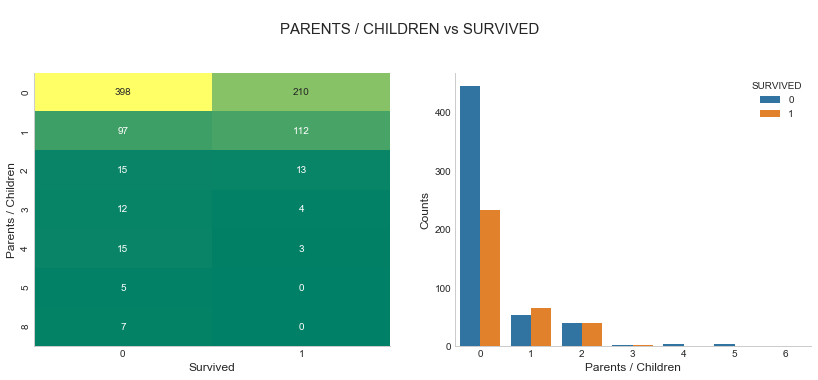

In [79]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
fig.suptitle('\nPARENTS / CHILDREN vs SURVIVED', fontsize=15, y=1.1)

sns.heatmap(pd.crosstab(df.siblings_or_spouse, df.survived), annot=True, fmt='.3g', cmap='summer', ax=axes[0], cbar=False)
axes[0].set_xlabel('Survived', fontsize=12)
axes[0].set_ylabel('Parents / Children', fontsize=12)

sns.countplot('parents_or_children', hue='survived', data=df, ax=axes[1])
sns.despine()
axes[1].set_xlabel('Parents / Children', fontsize=12)
axes[1].set_ylabel('Counts', fontsize=12)
axes[1].legend(loc=1, title='SURVIVED')

plt.tight_layout(pad=3)

<font size="3" color="#1C1AAB">
<li>Having parents or children increase the survival chance.</li>
</font>

### Bivariate Analysis

Lets go more deep. A study of relationship between two features and target feature can help us find out interactions between features.

#### CLASS and SEX

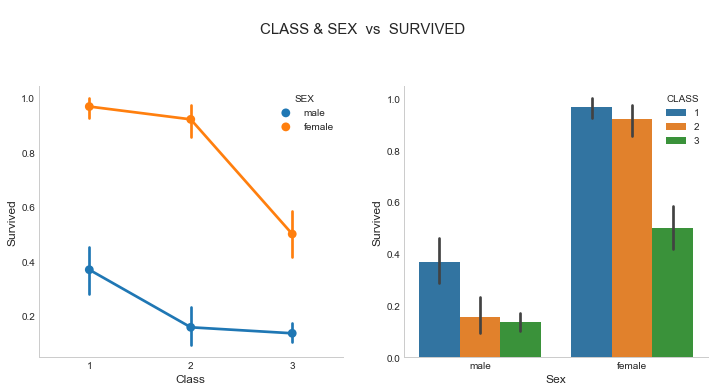

In [80]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
fig.suptitle('\nCLASS & SEX  vs  SURVIVED', fontsize=15, y=1.1)

sns.pointplot('class', 'survived', hue='sex', data=df, ax=axes[0])
axes[0].set_xlabel('Class', fontsize=12)
axes[0].set_ylabel('Survived', fontsize=12)
axes[0].legend(loc=1, title='SEX')

sns.barplot(x="sex", y="survived", hue="class", data=df, ax=axes[1])
axes[1].set_xlabel('Sex', fontsize=12)
axes[1].set_ylabel('Survived', fontsize=12)
axes[1].legend(loc=1, title='CLASS')

sns.despine()

<font size="3" color="#1C1AAB">
<li> We can easily find out that the survival of class 1 females is very high (> 95 percent).</li>
<li> For each class women were given first priority while rescue.</li>
</font>

#### AGE and CLASS

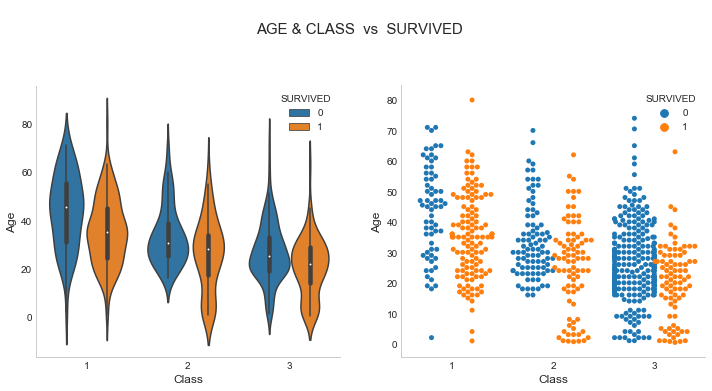

In [81]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
fig.suptitle('\nAGE & CLASS  vs  SURVIVED', fontsize=15, y=1.1)

sns.violinplot('class', 'age', hue='survived', data=df, dodge=True, ax=axes[0])
axes[0].set_xlabel('Class', fontsize=12)
axes[0].set_ylabel('Age', fontsize=12)
axes[0].legend(loc=1, title='SURVIVED')

sns.swarmplot('class', 'age', hue='survived', data=df, dodge=True, ax=axes[1])
axes[1].set_xlabel('Class', fontsize=12)
axes[1].set_ylabel('Age', fontsize=12)
axes[1].legend(loc=1, title='SURVIVED')

sns.despine()

<font size="3" color="#1C1AAB">
<li>Survival rate of children is high in all the three classes.</li>
<li>Old passengers of class 3 have low survival rates.</li>
</font>

#### SEX and AGE

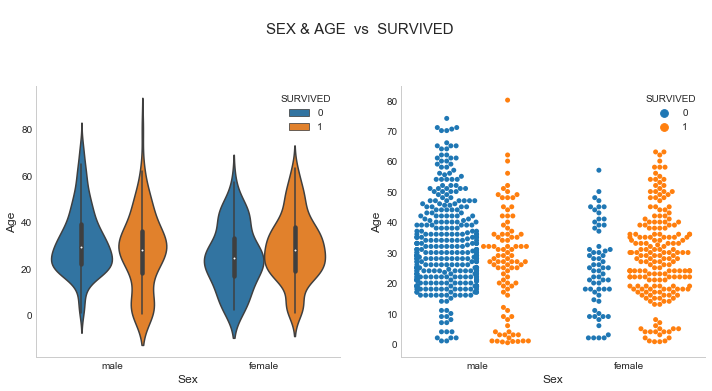

In [82]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
fig.suptitle('\nSEX & AGE  vs  SURVIVED', fontsize=15, y=1.1)

sns.violinplot('sex', 'age', hue='survived', data=df, dodge=True, ax=axes[0])
axes[0].set_xlabel('Sex', fontsize=12)
axes[0].set_ylabel('Age', fontsize=12)
axes[0].legend(loc=1, title='SURVIVED')

sns.swarmplot('sex', 'age', hue='survived', data=df, dodge=True, ax=axes[1])
axes[1].set_xlabel('Sex', fontsize=12)
axes[1].set_ylabel('Age', fontsize=12)
axes[1].legend(loc=1, title='SURVIVED')

sns.despine()

<font size="3" color="#1C1AAB">
<li> In males survival rate drops with age while in females the survival rate is high for old females too.</li>
</font>

#### TICKET COST and CLASS

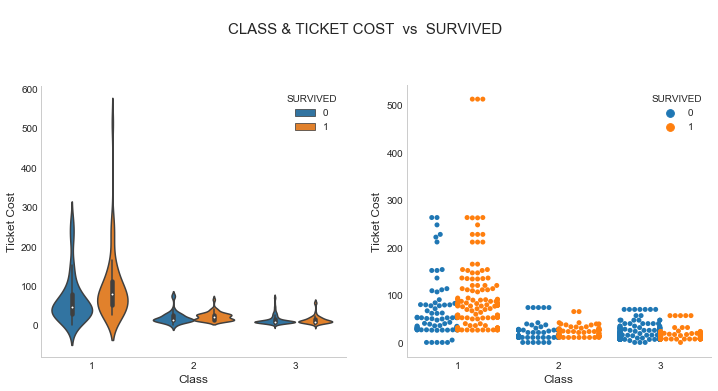

In [83]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
fig.suptitle('\nCLASS & TICKET COST  vs  SURVIVED', fontsize=15, y=1.1)

sns.violinplot('class', 'ticket_cost', hue='survived', data=df, dodge=True, ax=axes[0])
axes[0].set_xlabel('Class', fontsize=12)
axes[0].set_ylabel('Ticket Cost', fontsize=12)
axes[0].legend(loc=1, title='SURVIVED')

sns.swarmplot('class', 'ticket_cost', hue="survived", data=df, dodge=True, ax=axes[1])
axes[1].set_xlabel('Class', fontsize=12)
axes[1].set_ylabel('Ticket Cost', fontsize=12)
axes[1].legend(loc=1, title='SURVIVED')

sns.despine()

<font size="3" color="#1C1AAB">
<li> In class 1 survival rate increases with increase in ticket cost. </li>
</font>

<font color='#ED7217'><h3>EXPLORATORY DATA ANALYSIS SUMMARY</h3></font>

<pre>
<font size="4" color="#09919F">
<li><b>Survival</b>        :  Average survival percent for this dataset is 38.4 %.</li>
<li><b>Ticket Cost</b>     :  There is a better chance to survive for passengers with costlier tickets.</li>
<li><b>Age</b>             :  There is also an increase in survival probability with increase in age.</li>
<li><b>Sex</b>             :  <font color='green'><i>The survival rate of females is quite high as compared to males.</i></font></li>
<li><b>Class</b>           :  The survival rate of class 1 is high and survival rate of class 3 is low.</li>
<li><b>Port</b>            :  Port C has a high survival chance and Port S has a low survival chance.</li>
<li><b>Siblings/Spouse</b> :  Having siblings or spouse improves the probability of survival.</li>
<li><b>Parents/Children</b>:  Having parents or children also improves the probability of survival.</li><br><br>
<li><b>Class-Sex</b></li>
<li>        Survival of first class females is very high (> 95 %).</li>
<li>        Female survival rate is higher than male in each class.</li>
<li><b>Age-Class</b></li>
<li>        Survival rate of children is high in each class.</li>
<li>        Old passengers of class 3 have low survival rate.</li>
<li><b>Sex-Age</b></li>
<li>        Survival rate drops with age in males while its high for old females too.</li>
<li><b>Ticket Cost-Class</b></li>
<li>        For class 1, survival rate increases with increase in ticket cost.</li>
</font>
</pre>

## 2.3 Correlation Analysis

Further analysis and correlations, relations that may exist in the data

Correlation between numeric features will provide information about inter dependencies between different features.

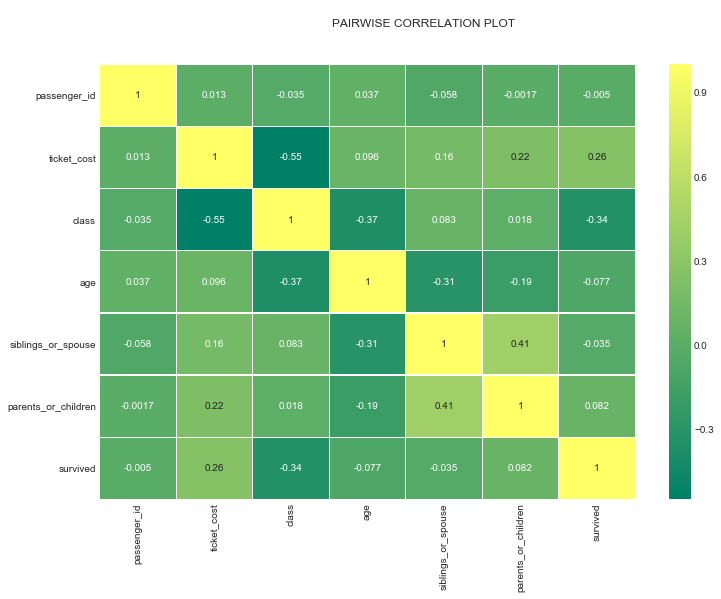

In [84]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='summer', linewidths=0.2)
fig=plt.gcf()
fig.suptitle('\nPAIRWISE CORRELATION PLOT')
plt.show()

<font color='#ED7217'><h3>CORRELATION INSIGHTS</h3></font>

<pre>
<font size="4" color="#09919F">
<li> <b>Positive Correlation</b></li>
<li>       Perents/Children-Siblings/Spouse</li>
<li> <b>Negative Correlation</b></li>
<li>       TicketCost-Class</li>
<li>       Age-Class</li>
<li>       Age-Siblings/Spouse</li>
</font>
</pre>

# 3. Data Cleaning

Cleaning the data

### Missing Value Correction

#### PORT

In [85]:
df[df.port.isnull()]

,passenger_id,ticket,ticket_cost,port,class,cabin_number,full_name,sex,age,siblings_or_spouse,parents_or_children,survived
61,62,113572,80.0,NaN,1,B28,"Icard, Miss. Amelie",female,38.0,0,0,1
829,830,113572,80.0,NaN,1,B28,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,1


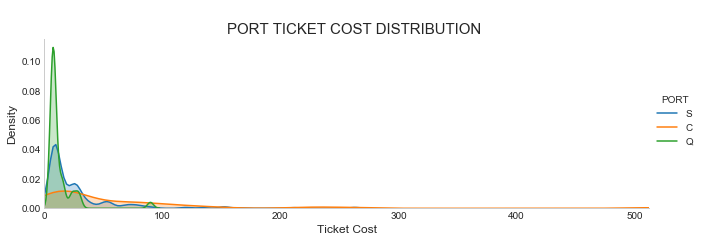

In [86]:
facet = sns.FacetGrid(df, hue="port", aspect=3, size=3)
facet.map(sns.kdeplot, 'ticket_cost', shade= True)
facet.set(xlim=(0, df['ticket_cost'].max()))
facet.add_legend(title='PORT')
facet.fig.suptitle('\nPORT TICKET COST DISTRIBUTION', fontsize=15, y=1.1, x=0.5)
facet.set_xlabels('Ticket Cost', fontsize=12)
facet.set_ylabels('Density', fontsize=12);

<font size="3" color="#1C1AAB">
<li> For the two samples ticket, cost is 80. We can find that the prob of missing port to be 'C' is high from the ticket_cost distribution for different ports.</li>
</font>

In [87]:
df['port'] = df['port'].fillna('C')

#### AGE

There is some age information in name itself the tokens Mr, Mrs, Master etc can give a rough estimate of age.

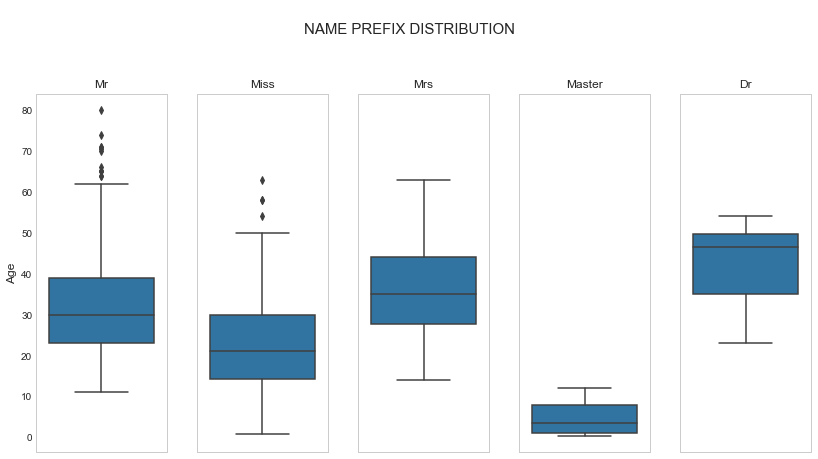

In [88]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(12,6), sharey=True)

fig.suptitle('\nNAME PREFIX DISTRIBUTION', fontsize=15, y=1.1, x=0.5)

sns.boxplot(df.loc[df.full_name.apply(lambda x: 'Mr.' in x), 'age'], orient='v', ax=axes[0])
axes[0].set_title('Mr', fontsize=12)
axes[0].set_ylabel('Age', fontsize=12)

sns.boxplot(df.loc[df.full_name.apply(lambda x: 'Miss.' in x), 'age'], orient='v', ax=axes[1])
axes[1].set_title('Miss', fontsize=12)
axes[1].set_ylabel('')

sns.boxplot(df.loc[df.full_name.apply(lambda x: 'Mrs.' in x), 'age'], orient='v', ax=axes[2])
axes[2].set_title('Mrs', fontsize=12)
axes[2].set_ylabel('')

sns.boxplot(df.loc[df.full_name.apply(lambda x: 'Master.' in x), 'age'], orient='v', ax=axes[3])
axes[3].set_title('Master', fontsize=12)
axes[3].set_ylabel('')

sns.boxplot(df.loc[df.full_name.apply(lambda x: 'Dr.' in x), 'age'], orient='v', ax=axes[4])
axes[4].set_title('Dr', fontsize=12)
axes[4].set_ylabel('')

plt.tight_layout(pad=3)

In [89]:
median_age_mr = 30
median_age_miss = 21
median_age_mrs = 35
median_age_master = 4
median_age_dr = 47


df.loc[(df.age.isnull()) & (df.full_name.apply(lambda x: 'Mr.' in x)), 'age'] = median_age_mr
df.loc[(df.age.isnull()) & (df.full_name.apply(lambda x: 'Miss.' in x)), 'age'] = median_age_miss
df.loc[(df.age.isnull()) & (df.full_name.apply(lambda x: 'Mrs.' in x)), 'age'] = median_age_mrs
df.loc[(df.age.isnull()) & (df.full_name.apply(lambda x: 'Master.' in x)), 'age'] = median_age_master
df.loc[(df.age.isnull()) & (df.full_name.apply(lambda x: 'Dr.' in x)), 'age'] = median_age_dr

#### CABIN NUMBER

In [90]:
df = df.drop('cabin_number', axis=1)

77 percent of data in cabin_number is missing. We can drop this column from our analysis.

<font color='#ED7217'><h3>DATA CLEANING RESULTS</h3></font>

<pre>
<font size="4" color="#09919F">
<li> <b>Cabin Number</b> has 77 % outliers. It can be easily dropped.</li>
<li> Passengers full names have some information about age. (Mr, Miss, Mrs, Master)</li>
<li> The age distribution of different name prefix distribution are distinct.</li>
<li> <b>Age</b> column missing values can be updated by corresponding name prefix medians.</li>
<li> <b>Port</b> column is missing for two observations. Can be estimated by ticket cost distribution.</li>
</font>
</pre>

# 4. Feature Engineering

#### AGE

<li> Noise and outliers in the age data can be removed by binning.</li>
<li> Minimum age is 0 and maximum age is ~ 80. Binning age into five bins. </li>

In [91]:
df['age_bin'] = df.age.apply(
                                lambda x: 0 if x < 10 else 1 if x < 25 else 2 if x < 45 else 3 if x < 60 else 4 
                        )

#### TICKET COST

<li> For removing outliers capping ticket costs can help.</li>

In [92]:
df.loc[df.ticket_cost>200, 'ticket_cost'] = 200

#### SIBLINGS-SPOUSE and PARENTS-CHILDREN

<li>Both these features can be combined to obtain family size.</li>
<li>From the univariate analysis we found that both features behave similarly so aggregating them can help.</li>

In [93]:
df['family_size'] = df.siblings_or_spouse + df.parents_or_children + 1

#### TICKET

<li>From the first look into our dataset we found that tickets are not unique. Many tickets are being shared between multiple passengers. This information can help in prediction.</li>

In [94]:
ticket_counts = df.ticket.value_counts().to_dict()
df['ticket_shared'] = df.ticket.apply(lambda x: 1 if ticket_counts[x]>1 else 0)

#### FULL NAME

<li>We found that name has important info like Mr, Mrs, Miss and Master. This can be used as a new feature. </li>

In [95]:
df['name_prefix'] = 'others'
df.loc[(df.full_name.apply(lambda x: 'Mr.' in x)), 'name_prefix'] = 'MR'
df.loc[(df.full_name.apply(lambda x: 'Miss.' in x)), 'name_prefix'] = 'MISS'
df.loc[(df.full_name.apply(lambda x: 'Mrs.' in x)), 'name_prefix'] = 'MRS'
df.loc[(df.full_name.apply(lambda x: 'Master.' in x)), 'name_prefix'] = 'MASTER'
df.loc[(df.full_name.apply(lambda x: 'Dr.' in x)), 'name_prefix'] = 'DR'

#### PORT, CLASS, SEX and NAME_PREFIX

<li>one hot encoding categoricals </li>

In [96]:
df = pd.get_dummies(df, columns=['port', 'class', 'sex', 'name_prefix'])

In [97]:
df.columns

Index(['passenger_id', 'ticket', 'ticket_cost', 'full_name', 'age',
       'siblings_or_spouse', 'parents_or_children', 'survived', 'age_bin',
       'family_size', 'ticket_shared', 'port_C', 'port_Q', 'port_S', 'class_1',
       'class_2', 'class_3', 'sex_female', 'sex_male', 'name_prefix_DR',
       'name_prefix_MASTER', 'name_prefix_MISS', 'name_prefix_MR',
       'name_prefix_MRS', 'name_prefix_others'],
      dtype='object')

In [98]:
final_df = df[[
                'ticket_cost', 
                'age_bin',
                'family_size',
                'ticket_shared',
                'port_C', 
                'port_S', 
                'port_Q', 
                'class_1', 
                'class_2', 
                'class_3',
                'sex_male',
                'sex_female',
                'name_prefix_MASTER',
                'name_prefix_MISS',
                'name_prefix_MRS',
                'name_prefix_MR',
                'name_prefix_DR',
                'survived'
            ]].copy()

X = final_df.drop('survived', axis=1).values
y = final_df.survived.values

In [35]:
final_df.head()

,ticket_cost,age_bin,family_size,ticket_shared,port_C,port_S,port_Q,class_1,class_2,class_3,sex_male,sex_female,name_prefix_MASTER,name_prefix_MISS,name_prefix_MRS,name_prefix_MR,name_prefix_DR,survived
0,7.2500,1,2,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0
1,71.2833,2,2,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1
2,7.9250,2,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1
3,53.1000,2,2,1,0,1,0,1,0,0,0,1,0,0,1,0,0,1
4,8.0500,2,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0


### CORRELATIONS FOR THE FINAL DATASET

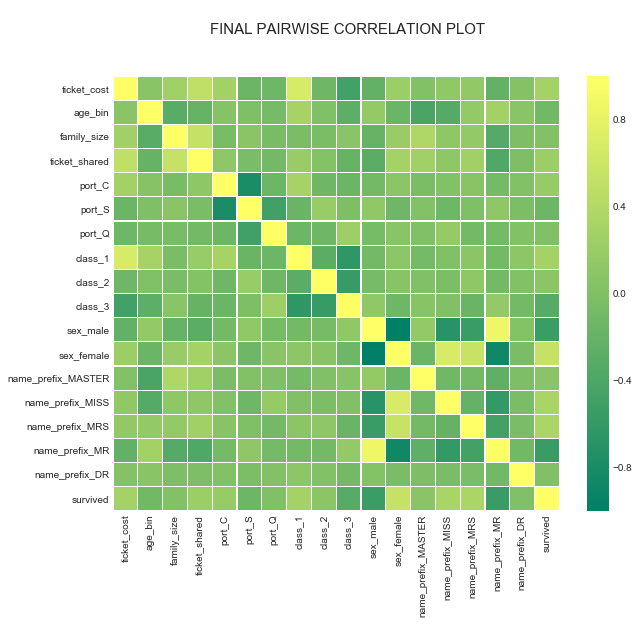

In [99]:
sns.heatmap(final_df.corr(), cmap='summer', linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,8)
fig.suptitle('\nFINAL PAIRWISE CORRELATION PLOT', fontsize=15, y=1, x=0.45)
plt.show()

<font color='#ED7217'><h3>FEATURE ENGINEERING EXPLANATION</h3></font>

<pre>
<font size="4" color="#09919F">
<li> <b>Age</b>         : This column is grouped to 5 bins to remove noise and outliers.</li>
<li> <b>Full Name</b>   : Name prefixes like Mr, Mrs etc. can be extracted to get a new feature.</li>
<li> <b>Ticket Cost</b> : Ticket Cost is capped to 200 to remove outliers.</li>
<li> <b>Ticket</b>      : Ticket sharing between passengers info is extracted to get a new feature.</li>
<li> Siblings, spouse, parents and children can be combined to get a feature for size of family.</li>
<li> One hot encoding of categorical feature (port, class, name_prefix, sex) is performed.</li>
</font>
</pre>

# 5. Creating Datasets

1. The test size is 30% of the total dataset.

2. The data for the training and test set is randomized.

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 6. Initial Models

Trying few simple models as a starting point for our predictive modelling. Absolute Accuracy is used as score for this classification problem. The outcome can be also checked for accuracy using confusion matrix.

In [100]:
## k fold cross validation
cv = StratifiedKFold(n_splits=5, random_state=42)

In [101]:
model_scores = dict()

<b>Logistic Regression</b>

In [102]:
clf_log = LogisticRegression(random_state=42)
clf_log = clf_log.fit(X_train, y_train)
score_log = cross_val_score(clf_log, X_train, y_train, cv=cv).mean()
print(score_log)

model_scores['LOGISTIC'] = score_log

0.8314785458269329


<b>KNNClassifier</b>

In [103]:
clf_knn = KNeighborsClassifier(n_neighbors=10, weights='distance')
clf_knn = clf_knn.fit(X_train, y_train)
score_knn = cross_val_score(clf_knn, X_train, y_train, cv=cv).mean()
print(score_knn)

model_scores['KNN_CLASSIFIER'] = score_knn

0.7833611879160266


<b>Support Vector Machine</b>

In [104]:
clf_svm = SVC(class_weight='balanced', random_state=42, probability=True)
clf_svm.fit(X_train, y_train)
score_svm = cross_val_score(clf_svm, X_train, y_train, cv=cv).mean()
print(score_svm)

model_scores['SVM_CLASSIFIER'] = score_svm

0.7817097798259087


<b>Naive Bayes Model</b>

In [105]:
clf_bay = GaussianNB()
clf_bay.fit(X_train, y_train)
score_bay = cross_val_score(clf_bay, X_train, y_train, cv=cv).mean()
print(score_bay)

model_scores['NB_CLASSIFIER'] = score_bay

0.7994125960061444


<b>Bagging</b>

In [106]:
bagging = BaggingClassifier(
    KNeighborsClassifier(
        n_neighbors=3,
        weights='distance'
        ),
    oob_score=True,
    max_samples=0.5,
    max_features=0.8,
    random_state=42
    )
clf_bag = bagging.fit(X_train, y_train)
score_bag = clf_bag.oob_score_
print(score_bag)

model_scores['KNN_BAGGING'] = score_bag

0.8025682182985554


<b>Decision Tree</b>

In [107]:
clf_tree = DecisionTreeClassifier(
    class_weight="balanced",
    min_weight_fraction_leaf=0.01,
    random_state=42
    )
clf_tree = clf_tree.fit(X_train, y_train)
score_tree = cross_val_score(clf_tree, X_train, y_train, cv=cv).mean()
print(score_tree)

model_scores['DECISION_TREE'] = score_tree

0.7831817716333844


<b>Random Forest Classifier</b>

In [108]:
clf_rf = RandomForestClassifier(
    n_estimators=1000, 
    max_depth=None,
    min_samples_split=10,
    random_state=42
    )
clf_rf = clf_rf.fit(X_train, y_train)
score_rf = cross_val_score(clf_rf, X_train, y_train, cv=cv).mean()
print(score_rf)

model_scores['RANDOM_FOREST'] = score_rf

0.8330916538658475


<b>Extra Trees Classifier</b>

In [109]:
clf_ext = ExtraTreesClassifier(
    max_features='auto',
    bootstrap=True,
    oob_score=True,
    n_estimators=1000,
    max_depth=None,
    min_samples_split=10,
    random_state=42
    )
clf_ext = clf_ext.fit(X_train, y_train)
score_ext = cross_val_score(clf_ext, X_train, y_train, cv=cv).mean()
print(score_ext)

model_scores['EXTRA_TREES'] = score_ext

0.8347043522785459


<b>Gradient Boosting</b>

In [110]:
clf_gb = GradientBoostingClassifier(
            n_estimators=1000,
            learning_rate=0.1,
            max_depth=3,
            subsample=0.5,
            random_state=42)
clf_gb.fit(X_train, y_train)
score_gb = cross_val_score(clf_gb, X_train, y_train, cv=cv).mean()
print(score_gb)

model_scores['BOOSTING'] = score_gb

0.8203297491039427


<b>Ada Boost</b>

In [111]:
clf_ada = AdaBoostClassifier(n_estimators=400, learning_rate=0.1,random_state=42)
clf_ada.fit(X_train, y_train)
score_ada = cross_val_score(clf_ada, X_train, y_train, cv=cv).mean()
print(score_ada)

model_scores['ADA_BOOST'] = score_ada

0.8186140296979006


<b>XGBoost</b>

In [112]:
clf_xgb = XGBClassifier(
    max_depth=2,
    n_estimators=500,
    subsample=0.5,
    learning_rate=0.1,
    random_state=42
    )
clf_xgb.fit(X_train, y_train)
score_xgb = cross_val_score(clf_xgb, X_train, y_train, cv=cv).mean()
print(score_xgb)

model_scores['XGBOOST'] = score_xgb

0.8218013312852023


<b>LightGBM</b>

In [113]:
clf_lgb = LGBMClassifier(
    max_depth=2,
    n_estimators=500,
    subsample=0.5,
    learning_rate=0.1,
    random_state=42
    )
clf_lgb.fit(X_train, y_train)
score_lgb = cross_val_score(clf_lgb, X_train, y_train, cv=cv).mean()
print(score_lgb)

model_scores['LightGBM'] = score_lgb

0.8266015360983102


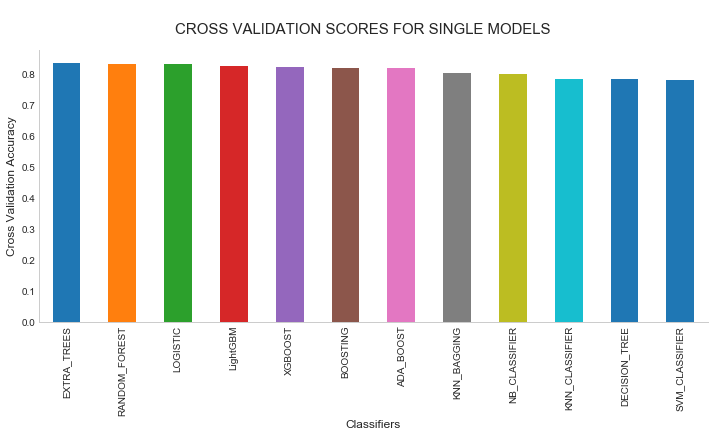

In [52]:
fig, ax = plt.subplots(figsize=(12,5))
fig.suptitle('\nCROSS VALIDATION SCORES FOR SINGLE MODELS', fontsize=15, y=1)
pd.Series(model_scores).sort_values(ascending=False).plot.bar(ax=ax)
ax.set_xlabel('Classifiers', fontsize=12)
ax.set_ylabel('Cross Validation Accuracy', fontsize=12)
sns.despine()

<font color='#ED7217'><h3>INITIAL MODELS EXPLANATION</h3></font>

<pre>
<font size="4" color="#09919F">
<li> Different classifiers are trained over training set using 5 fold cross validation strategy.</li>
<li> Extra Trees Classifier has the best cross validation accuracy.</li>
<li> Simple Logistic Regression also leads to near best cross validation accuracy.</li>
</font>
</pre>

## 6.1 Model Evaluation

Provide an evaluation of your model using a test dataset that is made up of 30% of the total dataset.

In [115]:
test_scores = dict()

test_scores['Logistic'] = accuracy_score(y_test, clf_log.predict(X_test))
test_scores['AdaBoost'] = accuracy_score(y_test, clf_ada.predict(X_test))
test_scores['Boosting'] = accuracy_score(y_test, clf_gb.predict(X_test))
test_scores['DecisionTree'] = accuracy_score(y_test, clf_tree.predict(X_test))
test_scores['ExtraTrees'] = accuracy_score(y_test, clf_ext.predict(X_test))
test_scores['KNNBagging'] = accuracy_score(y_test, clf_bag.predict(X_test))
test_scores['KNNClassifier'] = accuracy_score(y_test, clf_knn.predict(X_test))
test_scores['LightGBM'] = accuracy_score(y_test, clf_lgb.predict(X_test))
test_scores['GaussianNB'] = accuracy_score(y_test, clf_bay.predict(X_test))
test_scores['RandomForest'] = accuracy_score(y_test, clf_rf.predict(X_test))
test_scores['SVMClassifier'] = accuracy_score(y_test, clf_svm.predict(X_test))
test_scores['XGBoost'] = accuracy_score(y_test, clf_xgb.predict(X_test))

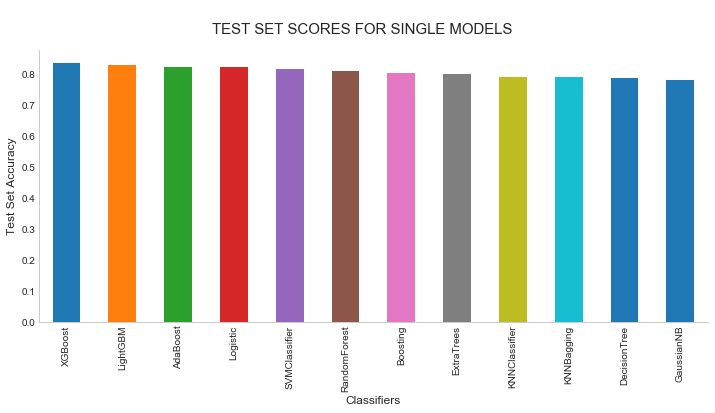

In [116]:
fig, ax = plt.subplots(figsize=(12,5))
fig.suptitle('\nTEST SET SCORES FOR SINGLE MODELS', fontsize=15, y=1)
pd.Series(test_scores).sort_values(ascending=False).plot.bar(ax=ax)
ax.set_xlabel('Classifiers', fontsize=12)
ax.set_ylabel('Test Set Accuracy', fontsize=12)
sns.despine()

<font color='#ED7217'><h3>INITIAL MODELS EVALUATION</h3></font>

<pre>
<font size="4" color="#09919F">
<li> Test Set that is 30 % of overall data is used for reporting final accuracy</li>
<li> XGBoost Classifier has the best test set accuracy.</li>
<li> Simple Logistic Regression also leads to near best test accuracy.</li>
</font>
</pre>

# 7. Refining the Model

Stacking the simple models from the last step can help us to increase overall accuracy.

#### Out of Fold prediction for stacking

In [117]:
n_train = X.shape[0]
n_test = X_test.shape[0]
random_seed = 42
n_folds = 5

In [56]:
def get_oof(clf, x_train, y_train, x_test):
    
    oof_train = np.zeros((n_train,))
    oof_test = np.zeros((n_test,))
    oof_test_skf = np.empty((n_folds, n_test))

    for i, (train_index, test_index) in enumerate(cv.split(x_train, y_train)):
        
        x_tr = x_train[train_index]
        y_tr = y_train[train_index]
        x_te = x_train[test_index]

        clf.fit(x_tr, y_tr)

        oof_train[test_index] = clf.predict(x_te)
        oof_test_skf[i, :] = clf.predict(x_test)

    oof_test[:] = oof_test_skf.mean(axis=0)
    return oof_train.reshape(-1, 1), oof_test.reshape(-1, 1)

In [118]:
log_oof_train, log_oof_test = get_oof(clf_log, X, y, X_test) # LogisticRegression
ada_oof_train, ada_oof_test = get_oof(clf_ada, X, y, X_test) # Ada Boost 
bst_oof_train, bst_oof_test = get_oof(clf_gb, X, y, X_test) # Boosting
tre_oof_train, tre_oof_test = get_oof(clf_tree, X, y, X_test) # Decision Tree 
ext_oof_train, ext_oof_test = get_oof(clf_ext, X, y, X_test) # Extra Trees
bag_oof_train, bag_oof_test = get_oof(clf_bag, X, y, X_test) # KNN Bagging
knn_oof_train, knn_oof_test = get_oof(clf_knn, X, y, X_test) # KNN Classifier
lgb_oof_train, lgb_oof_test = get_oof(clf_lgb, X, y, X_test) # LightGBM
nbc_oof_train, nbc_oof_test = get_oof(clf_bay, X, y, X_test) # NB Classifier 
rfc_oof_train, rfc_oof_test = get_oof(clf_rf, X, y, X_test) # Random Forest
svc_oof_train, svc_oof_test = get_oof(clf_svm, X, y, X_test) # SVM Classifier
xgb_oof_train, xgb_oof_test = get_oof(clf_xgb, X, y, X_test) # XGBoost

#### Second Level Predictions

In [119]:
base_pred_train = pd.DataFrame({   
                                'Logistic' : log_oof_train.ravel(),
                                'AdaBoost' : ada_oof_train.ravel(),
                                'Boosting' : bst_oof_train.ravel(),
                                'DecisionTree' : tre_oof_train.ravel(),
                                'ExtraTrees' : ext_oof_train.ravel(),
                                'KNNBagging' : bag_oof_train.ravel(),
                                'KNNClassifier' : knn_oof_train.ravel(),
                                'LightGBM' : lgb_oof_train.ravel(),
                                'GaussianNB' : nbc_oof_train.ravel(),
                                'RandomForest' : rfc_oof_train.ravel(),
                                'SVMClassifier' : svc_oof_train.ravel(),
                                'XGBoost' : xgb_oof_train.ravel(),
                                'survived' : y
                              })
base_pred_train.head()

,Logistic,AdaBoost,Boosting,DecisionTree,ExtraTrees,KNNBagging,KNNClassifier,LightGBM,GaussianNB,RandomForest,SVMClassifier,XGBoost,survived
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [59]:
base_pred_test = pd.DataFrame({   
                                'Logistic' : log_oof_test.ravel(),
                                'AdaBoost' : ada_oof_test.ravel(),
                                'Boosting' : bst_oof_test.ravel(),
                                'DecisionTree' : tre_oof_test.ravel(),
                                'ExtraTrees' : ext_oof_test.ravel(),
                                'KNNBagging' : bag_oof_test.ravel(),
                                'KNNClassifier' : knn_oof_test.ravel(),
                                'LightGBM' : lgb_oof_test.ravel(),
                                'GaussianNB' : nbc_oof_test.ravel(),
                                'RandomForest' : rfc_oof_test.ravel(),
                                'SVMClassifier' : svc_oof_test.ravel(),
                                'XGBoost' : xgb_oof_test.ravel(),
                              })
base_pred_test.head()

,Logistic,AdaBoost,Boosting,DecisionTree,ExtraTrees,KNNBagging,KNNClassifier,LightGBM,GaussianNB,RandomForest,SVMClassifier,XGBoost
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,0.8,0.8,1.0,0.8,0.8,1.0,1.0,0.8,1.0,1.0


#### Visualizing correlation between different models

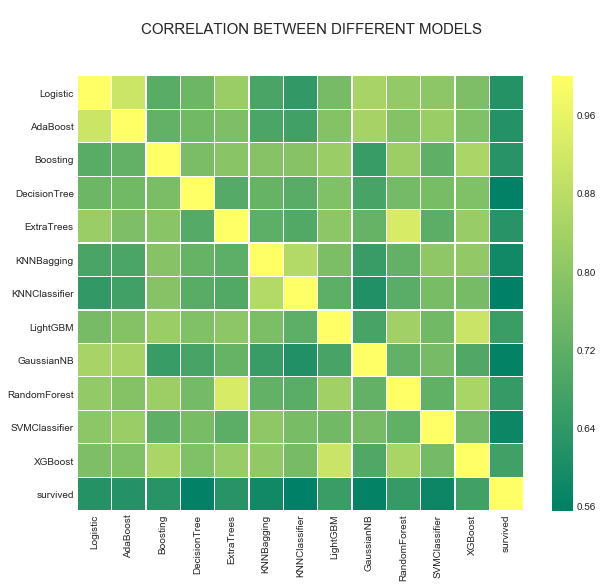

In [120]:
sns.heatmap(base_pred_train.corr(), cmap='summer', linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,8)
fig.suptitle('\nCORRELATION BETWEEN DIFFERENT MODELS', fontsize=15, y=1, x=0.45)
plt.show()

#### Can find out some uncorrelated models so we can expect a better accuracy from second level training

In [122]:
X_train_stacked = base_pred_train.drop('survived', axis=1).values
y_train_stacked = base_pred_train.survived.values

X_test_stacked = base_pred_test.values

In [123]:
final_model = XGBClassifier(
                                colsample_bytree=0.85,
                                learning_rate=0.225, 
                                gamma=0.7,
                                max_depth=2,
                                min_child_weight=1,
                                n_estimators=376,
                                objective='binary:logistic',
                                subsample=1
                            )
final_model.fit(X_train_stacked, y_train_stacked)
final_score = cross_val_score(final_model, X_train_stacked, y_train_stacked, cv=cv).mean()
print(final_score)

0.8339635227767204


In [124]:
accuracy_score(y_test, final_model.predict(X_test_stacked))

0.8843283582089553

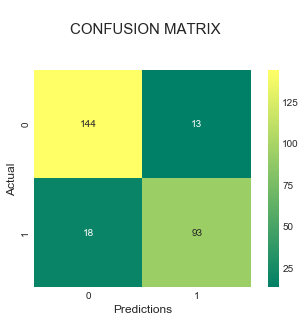

In [64]:
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.suptitle('\nCONFUSION MATRIX', fontsize=15, y=1.1)
sns.heatmap(pd.crosstab(y_test,  final_model.predict(X_test_stacked), rownames=['true'], colnames=['pred']), square=True, cmap='summer', annot=True, fmt='.3g', ax=ax)
ax.set_xlabel('Predictions', fontsize=12)
ax.set_ylabel('Actual', fontsize=12);

<font color='#ED7217'><h3>REFINING MODEL FOR HIGHER ACCURACY</h3></font>

<pre>
<font size="4" color="#09919F">
<li> All the base classifiers are used to obtain second level predictions for stacking.</li>
<li> XGBoost Classifier is trained over second level predictions.</li>
<li> <font color='green'><b>Final Accuracy is ~ 88 % for stacked model while the best single model has ~ 83 % accuracy.</b></font></li>
</font>
</pre>

### THANKS